<a href="https://colab.research.google.com/github/mervegb/vacation-preference-prediction/blob/main/vacation_preference_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jahnavipaliwal_mountains_vs_beaches_preference_path = kagglehub.dataset_download('jahnavipaliwal/mountains-vs-beaches-preference')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#For encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#For splitting data
from sklearn.model_selection import train_test_split

#Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('/kaggle/input/mountains-vs-beaches-preference/mountains_vs_beaches_preferences.csv')

#Display the first 5 rows
data.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [ ]:
#Shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

data.info()

Dataset contains 52444 rows and 14 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9)

In [ ]:
#Check for missing values
data.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [ ]:
data.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


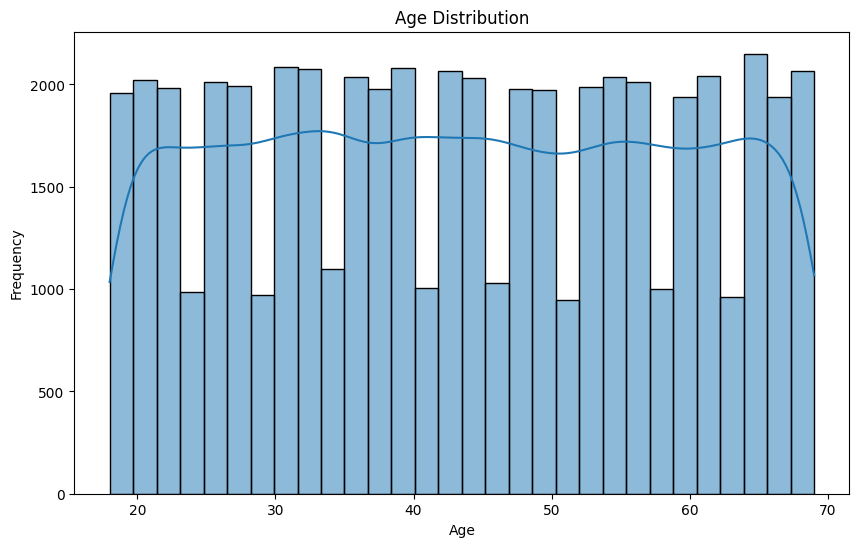

In [ ]:
#Data Visualization

#Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

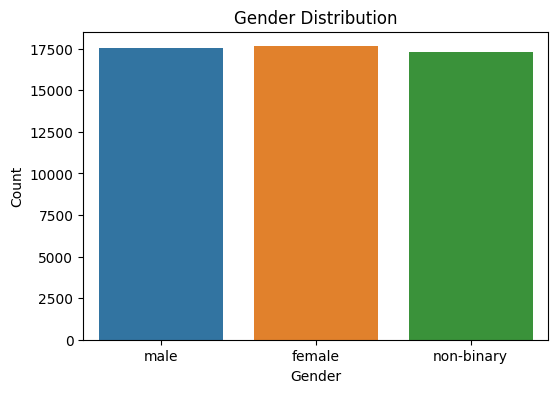

In [ ]:
#Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

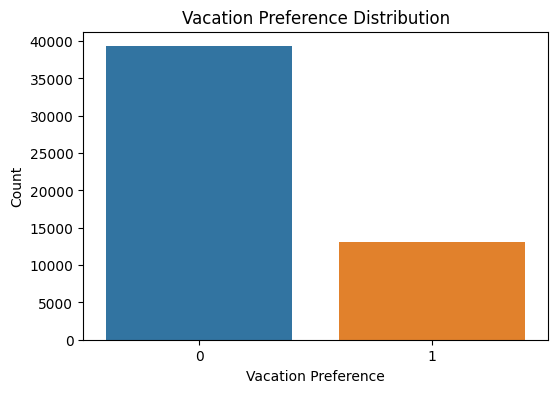

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Preference", data=data)
plt.title("Vacation Preference Distribution")
plt.xlabel("Vacation Preference")
plt.ylabel("Count")
plt.show()

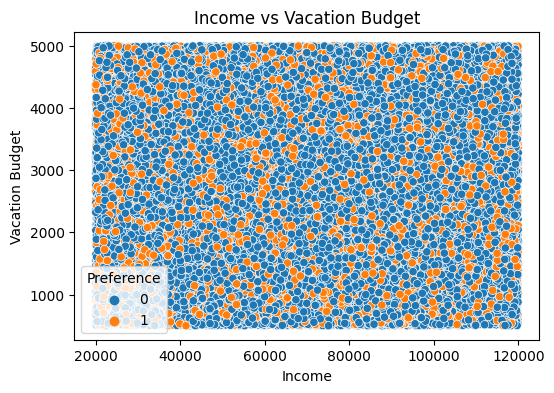

In [ ]:
#Income vs Vacation Budget
plt.figure(figsize=(6,4))
sns.scatterplot(x="Income", y="Vacation_Budget", hue="Preference", data=data)
plt.title("Income vs Vacation Budget")
plt.xlabel("Income")
plt.ylabel("Vacation Budget")
plt.show()

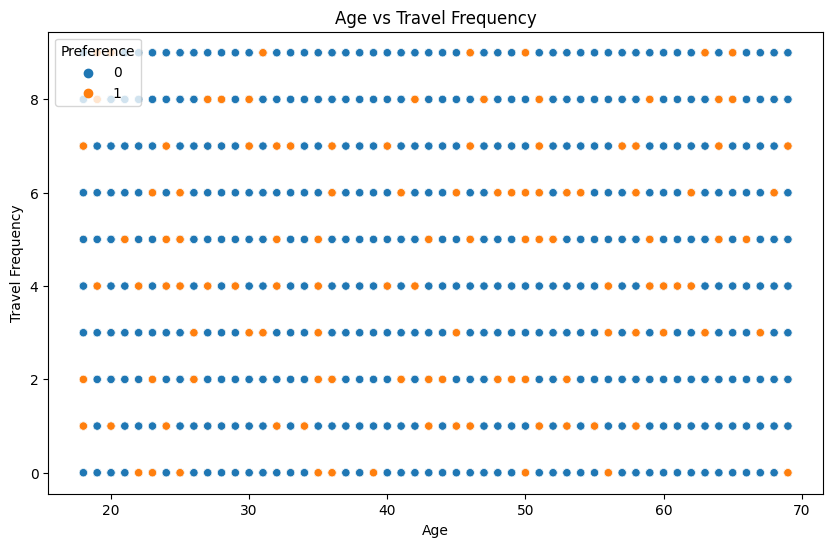

In [ ]:
#Age vs Travel Frequency
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y="Travel_Frequency", hue="Preference", data=data)
plt.title("Age vs Travel Frequency")
plt.xlabel("Age")
plt.ylabel("Travel Frequency")
plt.show()

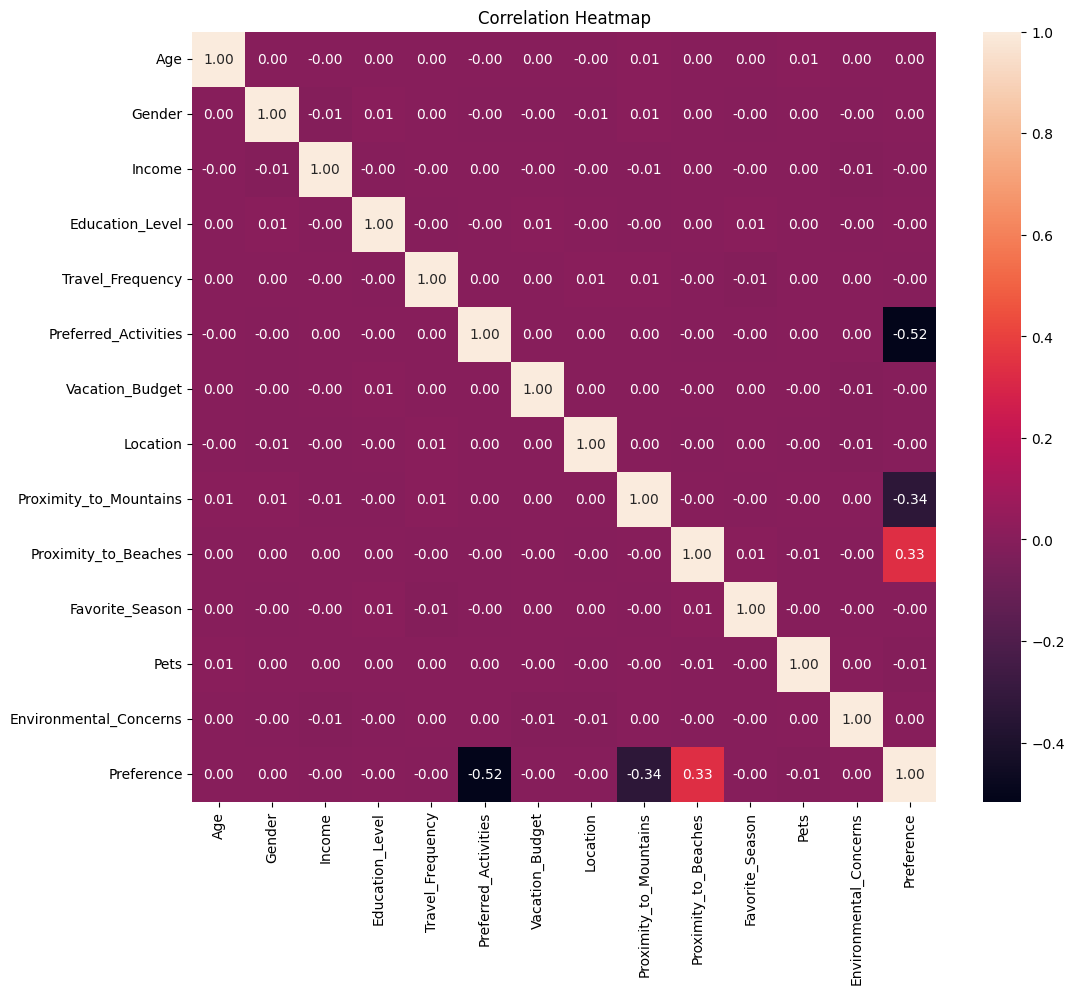

In [ ]:
#Correlation Heatmap: helps reveal relationships in data
data_encoded = data.copy()
label_encoder = LabelEncoder()

categorical_cols = ["Gender", "Education_Level", "Preferred_Activities", "Location", "Favorite_Season", "Preference"]

for col in categorical_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

plt.figure(figsize=(12,10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Data Preprocessing**

**Encoding categorical variables**

In [ ]:
#Identify categorical variables
categorical_vars = ['Gender', 'Education_Level', 'Preferred_Activities', 'Location', 'Favorite_Season']

data_preprocessed = data.copy()

#Label Encoding for "Gender"
label_enc = LabelEncoder()
data_preprocessed["Gender"] = label_enc.fit_transform(data_preprocessed['Gender'])

#One-Hot Encoding is ideal for nominal data where there is no orderin categories
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['Education_Level', 'Preferred_Activities', 'Location', 'Favorite_Season'])

**Feature Scaling**
ensures that different features contribute equally to model training
normalize or standardize features


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_vars = ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches']

scaler = StandardScaler()
data_preprocessed[numerical_vars] = scaler.fit_transform(data_preprocessed[numerical_vars])

**Feature Selection**
selecting the most relevant features from a dataset for training a ml model


In [ ]:
X = data_preprocessed.drop("Preference", axis=1) #drop the target column (column you want to predict)
y = data_preprocessed["Preference"] #target column you want to predict

y = label_enc.fit_transform(y)

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Model Building

**Logistic Regression**

In [ ]:
#Logistic Regression
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train) #trains the model on training data

y_pred_logreg = logreg.predict(X_test) #uses trained logistic regression model to predict labels for test data

#y_pred_logreg -> stores predicted labels for each sample in the test set

print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy:  0.9973305367527886
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7851
           1       1.00      0.99      0.99      2638

    accuracy                           1.00     10489
   macro avg       1.00      1.00      1.00     10489
weighted avg       1.00      1.00      1.00     10489

